In [1]:
import sys
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal

# Imports Scikit-Learn (Vus au TD Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Ajout du chemin vers tes scripts personnels et ceux du prof
# Assure-toi que le dossier contenant libsigma est bien ici
sys.path.append('/home/onyxia/work/') 

from libsigma import read_and_write as rw
from libsigma import classification as cla
# Tu devras créer ce fichier pour tes fonctions perso comme demandé dans le projet
#import my_function as mf 

# Configuration des dossiers
data_dir = "data/"
results_dir = "results/"
fig_dir = os.path.join(results_dir, "figure/")

# Création des dossiers de sortie si inexistants (Bonne pratique TD)
os.makedirs(fig_dir, exist_ok=True)

print("Environnement chargé.")

Environnement chargé.


In [2]:
import sys
import os

# Ajoutez le chemin vers le DOSSIER contenant my_function.py
sys.path.append('/home/onyxia/work/projet_teledec/notebook/') 

# Maintenant Python va trouver le fichier dans ce dossier
import my_function as mf 


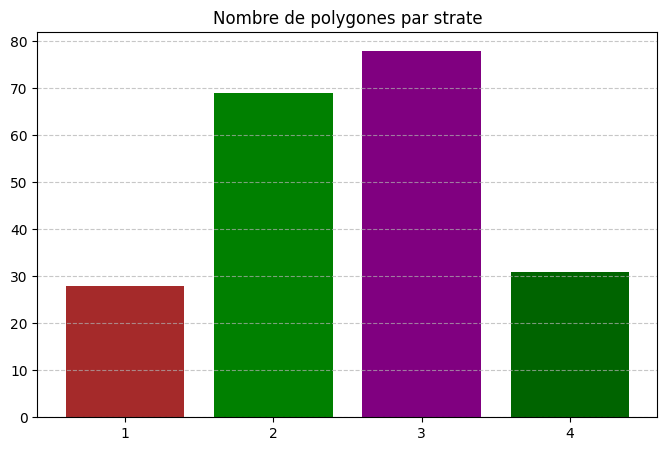

/opt/python/lib/python3.13/site-packages/osgeo/gdal.py:330: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Rasterisation terminée : /home/onyxia/work/data/projet_eval/sample_strata.tif


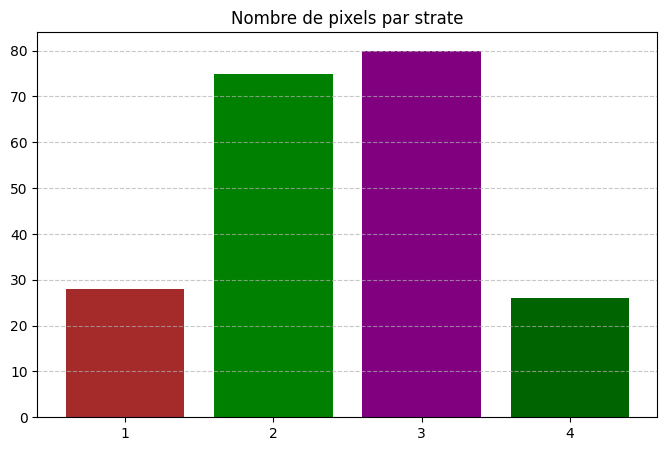

In [3]:
import sys
import os

# Ajoutez le chemin vers le DOSSIER contenant my_function.py
sys.path.append('/home/onyxia/work/projet_teledec/notebook/') 

# Maintenant Python va trouver le fichier dans ce dossier
import my_function as mf 

# --- Analyse des Polygones ---
# Assurez-vous que les chemins vers vos données (.shp) sont aussi corrects
mf.plot_poly_counts(
    shp_path='/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp',
    col_classe='strate',
    output_path='results/figure/diag_baton_nb_poly_by_class.png'
)
# --- Rasterisation ---
mf.rasterize_shapefile(
    image_ref_path='/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif',
    shp_path='/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp',
    output_raster='/home/onyxia/work/data/projet_eval/sample_strata.tif'
)

# --- Analyse des Pixels ---
mf.plot_pixel_counts(
    raster_path='/home/onyxia/work/data/projet_eval/sample_strata.tif',
    output_path='results/figure/diag_baton_nb_pix_by_class.png'
)

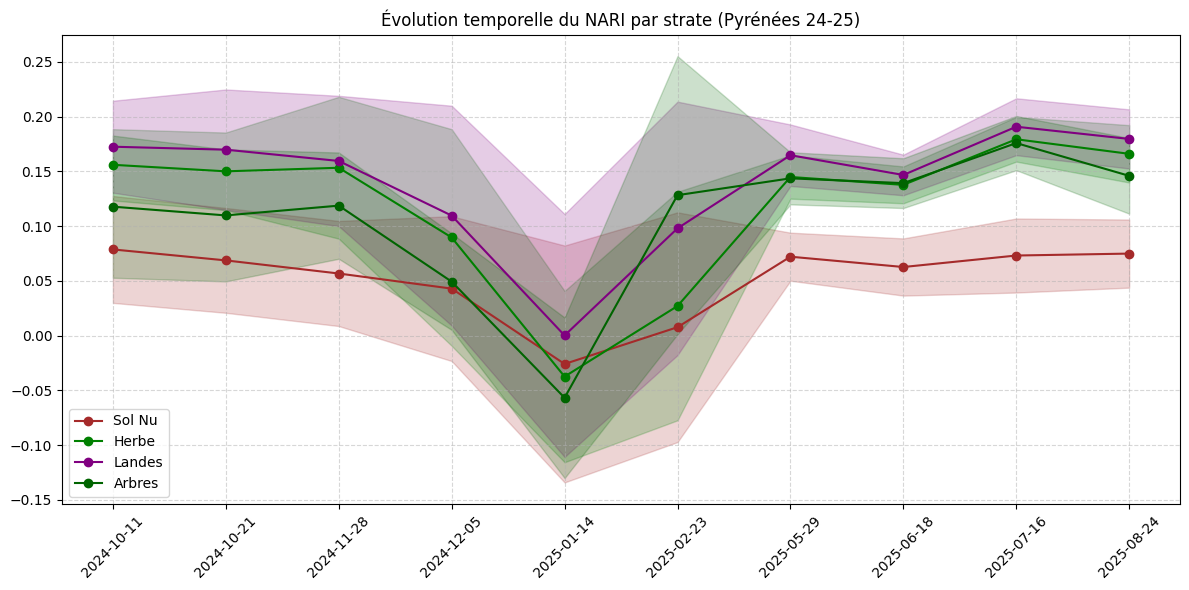

In [4]:
import my_function as mf

# Paramètres
dates_list = ['2024-10-11', '2024-10-21', '2024-11-28', '2024-12-05', '2025-01-14',
              '2025-02-23', '2025-05-29', '2025-06-18', '2025-07-16', '2025-08-24']
data_folder = '/home/onyxia/work/data/projet_eval'
fig_save_path = '/home/onyxia/work/projet_teledec/notebook/results/figure/ARI_series.png'

# Appel de la fonction
mf.process_nari_phenology(data_folder, dates_list, fig_save_path)



In [5]:
import my_function as mf

# Paramètres
base_data = '/home/onyxia/work/data/projet_eval'
nari_output = '/home/onyxia/work/projet_teledec/notebook/results/ARI_serie_temp.tif'

# Exécution
mf.create_nari_raster(base_data, nari_output)

Raster NARI créé : /home/onyxia/work/projet_teledec/notebook/results/ARI_serie_temp.tif


In [6]:
import my_function as mf

# Paramètres
base_dir = '/home/onyxia/work/data/projet_eval'
image_ref = base_dir + '/pyrenees_24-25_B02.tif'
shp_path = base_dir + '/PI_strates_pyrenees_32630.shp'
out_samples = base_dir + '/sample_strata.tif'
bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']

# Appel de la fonction
X, Y, groups = mf.prepare_classification_data(base_dir, image_ref, shp_path, out_samples, bands)

Données prêtes : X(209, 100), Y(209,), Groupes : 83


Optimisation en cours...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


Meilleurs paramètres : {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 300}

 RAPPORT DE CLASSIFICATION (Sur 30% de test)
              precision    recall  f1-score   support

      Sol Nu       0.89      1.00      0.94         8
       Herbe       0.83      0.83      0.83        23
      Landes       0.79      0.79      0.79        24
      Arbres       1.00      0.88      0.93         8

    accuracy                           0.84        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.84      0.84      0.84        63



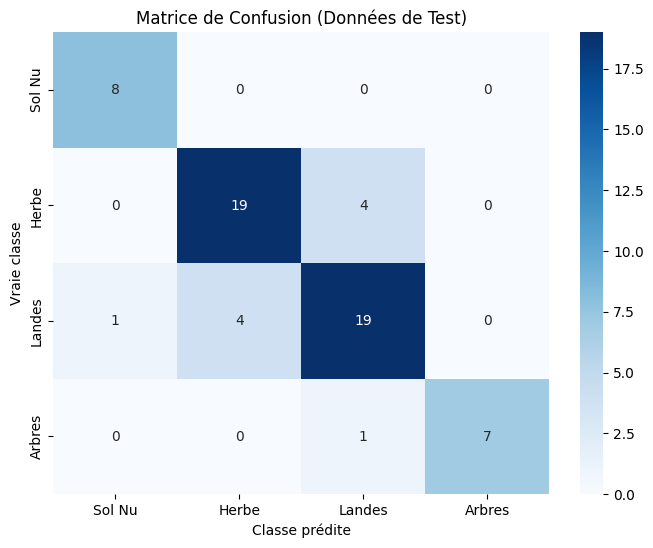

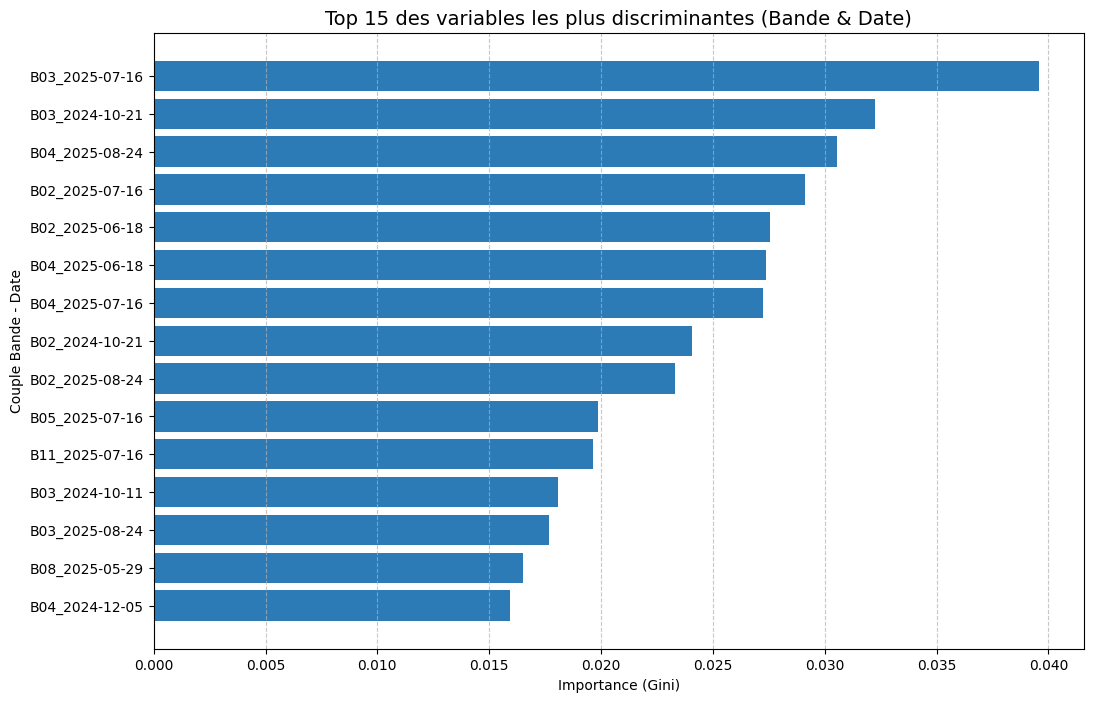


Top des variables pour le rapport :
      Variable  Importance
B03_2025-07-16    0.039592
B03_2024-10-21    0.032226
B04_2025-08-24    0.030549
B02_2025-07-16    0.029122
B02_2025-06-18    0.027546
B04_2025-06-18    0.027371
B04_2025-07-16    0.027228
B02_2024-10-21    0.024065
B02_2025-08-24    0.023303
B05_2025-07-16    0.019873
B11_2025-07-16    0.019619
B03_2024-10-11    0.018071
B03_2025-08-24    0.017692
B08_2025-05-29    0.016520
B04_2024-12-05    0.015940


In [7]:
import my_function as mf
import importlib
importlib.reload(mf)

# --- CONFIGURATION DES PARAMÈTRES ---
# On définit ici toutes les variables qui manquaient
target_names = ['Sol Nu', 'Herbe', 'Landes', 'Arbres']
bandes = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
dates_reelles = ['2024-10-11', '2024-10-21', '2024-11-28', '2024-12-05', '2025-01-14',
                 '2025-02-23', '2025-05-29', '2025-06-18', '2025-07-16', '2025-08-24']

# 1. OPTIMISATION
# On récupère le modèle optimisé via GridSearch
best_clf = mf.optimize_random_forest(X, Y, groups)

# 2. ÉVALUATION (Split 70/30 interne)
# On récupère le modèle entraîné sur les 70% pour pouvoir lire les importances après
best_clf = mf.evaluate_model(
    model=best_clf, 
    X=X, 
    Y=Y, 
    target_names=target_names,
    output_fig_path='results/figure/matrice_confusion_test.png'
)

# 3. AFFICHAGE DES VARIABLES CONTRIBUTIVES
# On utilise le modèle renvoyé par evaluate_model
mf.plot_feature_importance_dates(
    model=best_clf, 
    band_names=bandes, 
    dates=dates_reelles, 
    output_path='results/figure/feature_importance_top15.png'
)

Génération des graphiques pour : Automne (21 Oct)


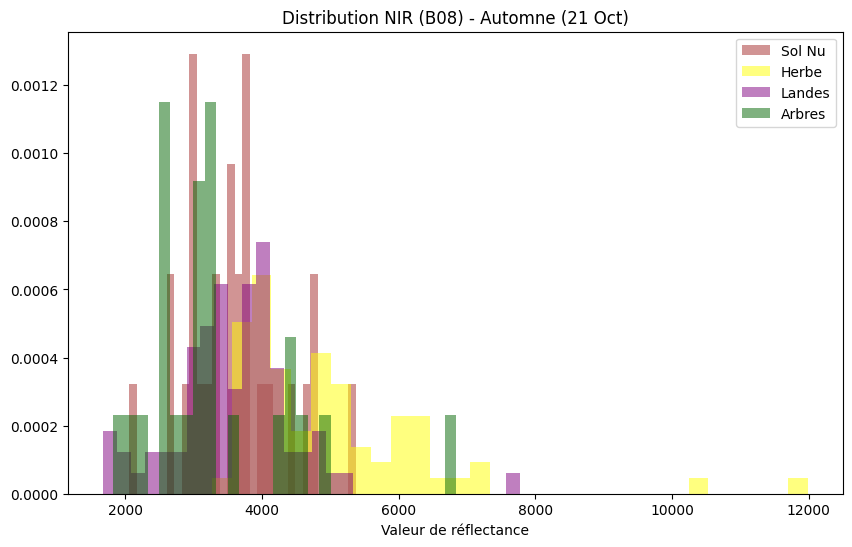

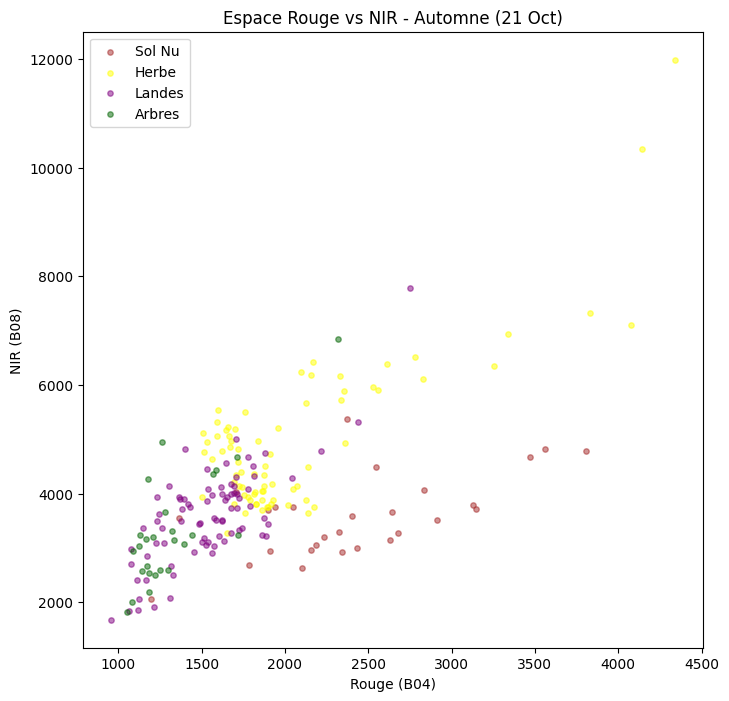

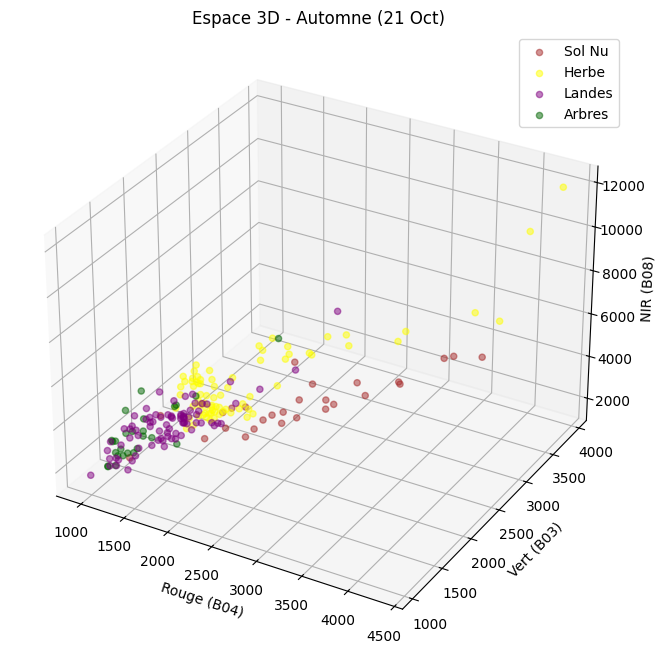

Génération des graphiques pour : Hiver (14 Jan)


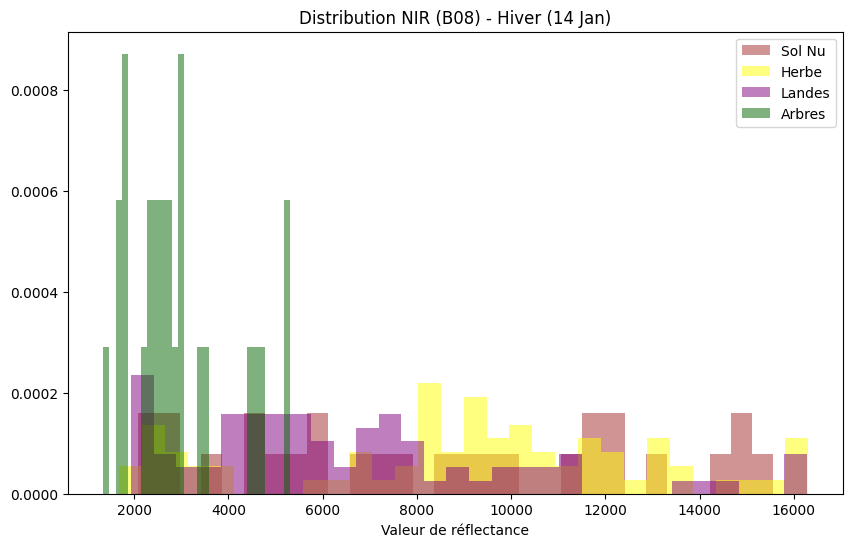

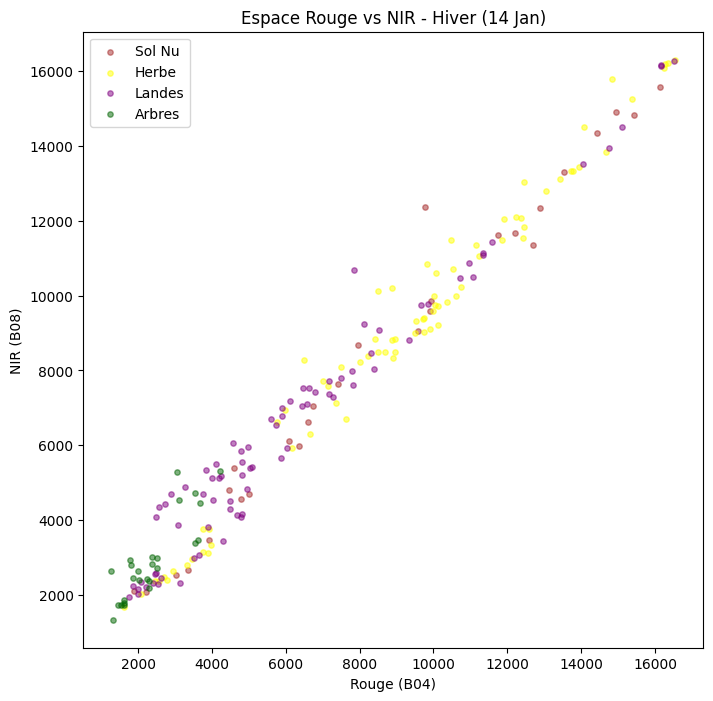

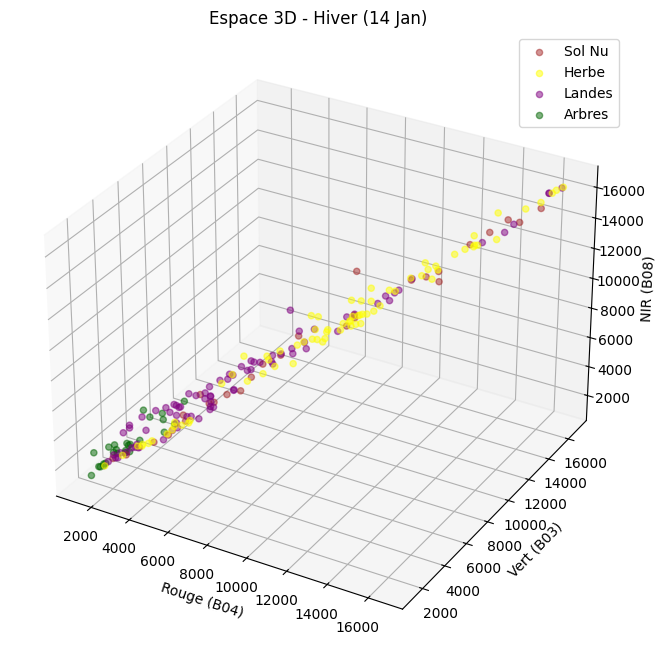

Génération des graphiques pour : Printemps (29 Mai)


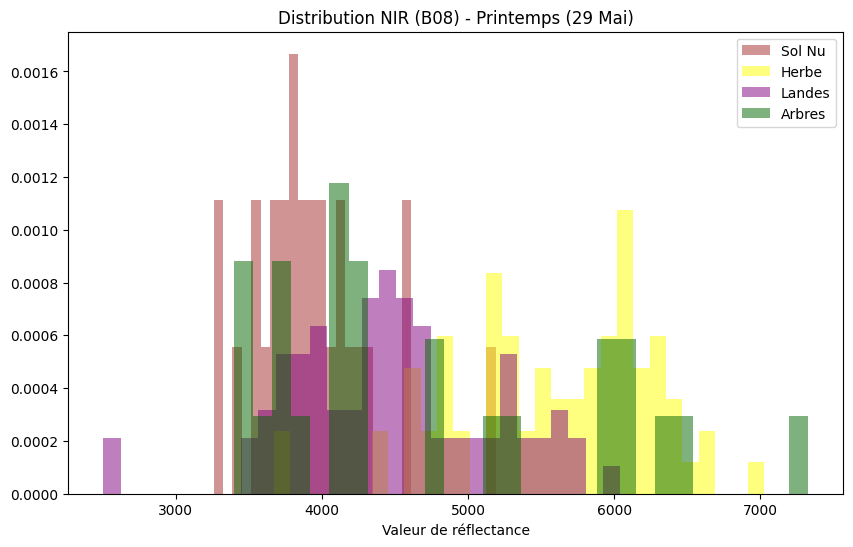

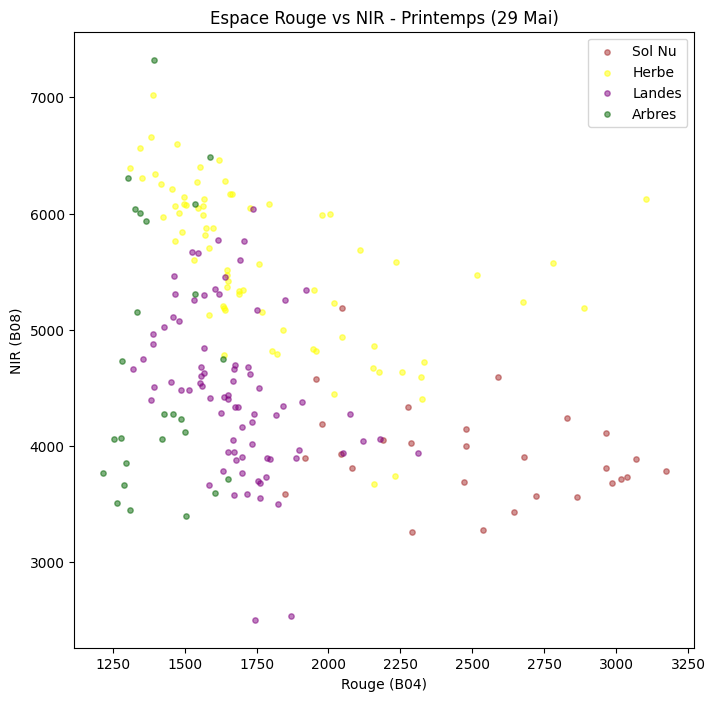

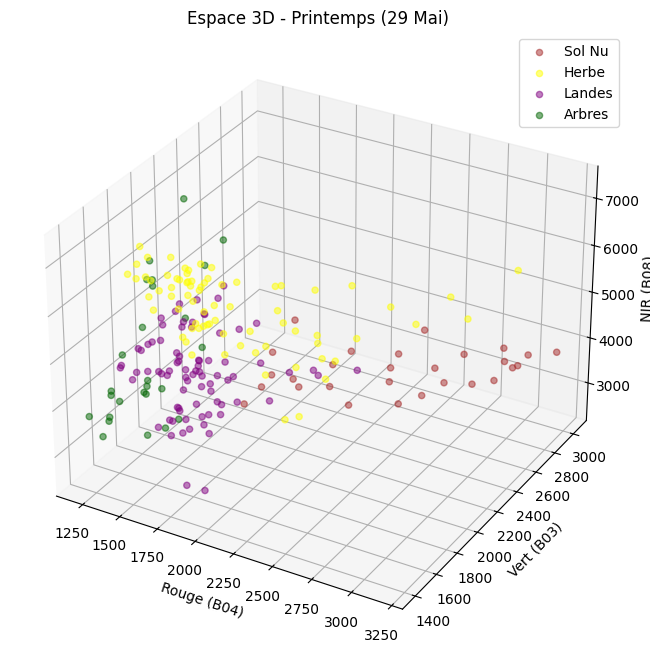

Génération des graphiques pour : Eté (16 Juil)


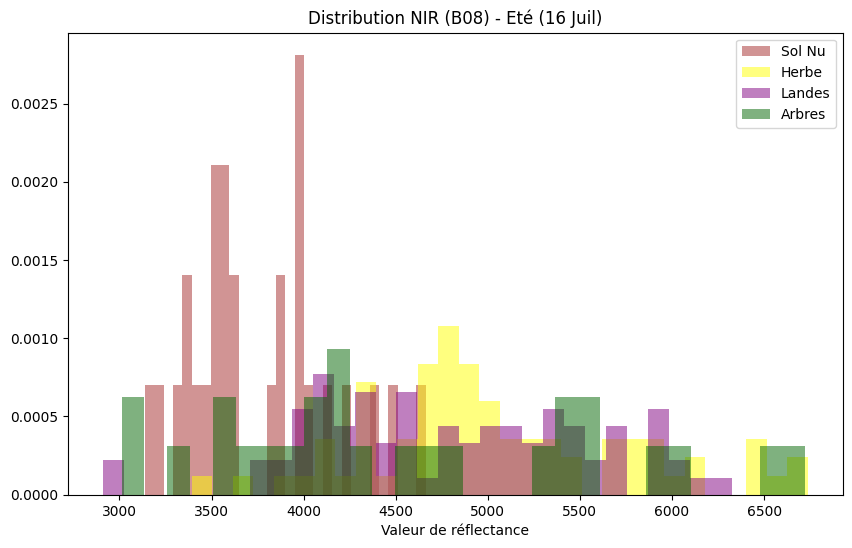

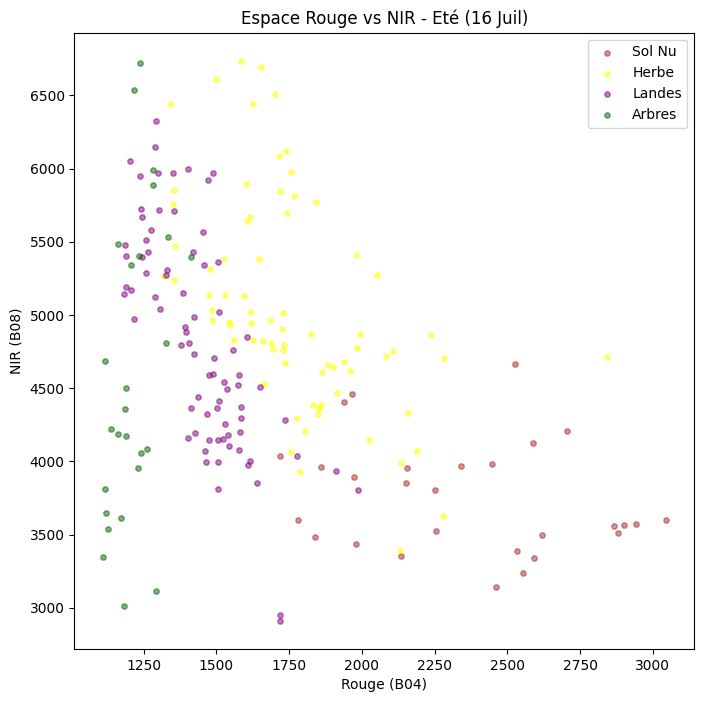

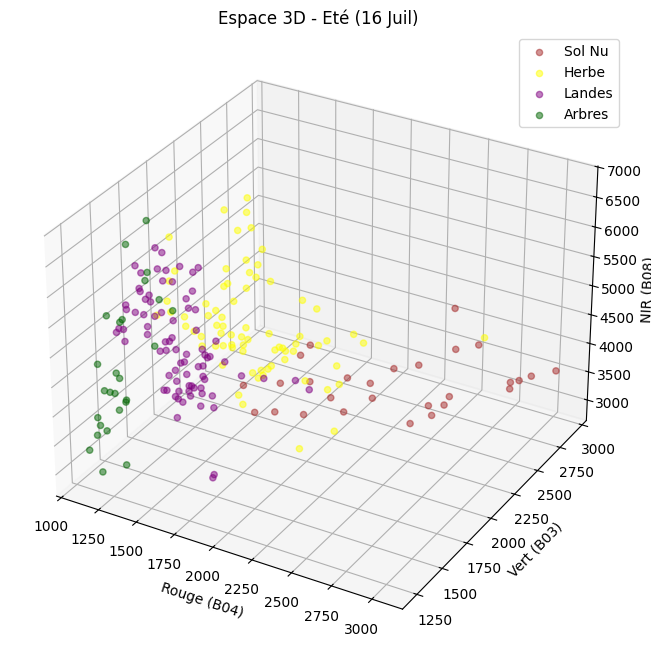

In [8]:
import my_function as mf

# On définit le dossier où enregistrer les images
results_fig_dir = 'results/figure'

# Appel de la fonction globale d'analyse
mf.plot_data_analysis(X, Y, results_fig_dir)

In [ ]:
import my_function as mf

# Paramètres
base_dir = '/home/onyxia/work/data/projet_eval'
bandes = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
out_path = '/home/onyxia/work/projet_teledec/notebook/results/carte_strates.tif'

# Production de la carte avec le meilleur modèle trouvé par GridSearch
mf.produce_final_map(best_clf, base_dir, bandes, out_path)

--- Production de la Carte Finale ---
Dimensions : 2103 x 1655


Données prêtes : (3480465, 100)
Lancement de la prédiction...
